<center><b>In the name of God</b></center>

<b>Course</b>: Machine Learning
<br>
<b>Description:</b> HomeWork 1 | Question 1
<br>
<b>Developer</b>: Alireza Mazochi (400131075)

# Load and Overview

In [5]:
import pandas as pd

# Reading Dataset
data = pd.read_csv("dataset1.csv")

[]

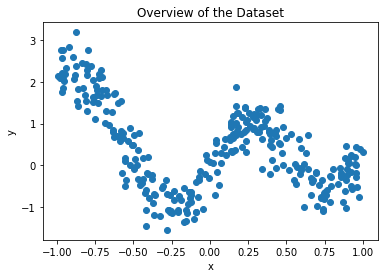

In [29]:
import matplotlib.pyplot as plt

# Plotting Data
plt.scatter(x=data["x"], y=data["y"])
plt.title("Overview of the Dataset")
plt.xlabel("x")
plt.ylabel("y")
plt.plot()

# Shuffling Needed?

[]

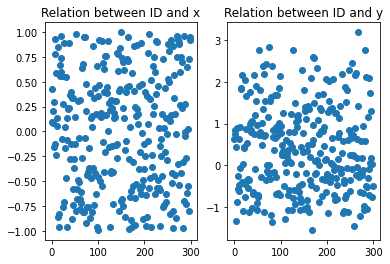

In [59]:
# Checking the realation of ID and features

fig, ax = plt.subplots(nrows=1, ncols=2)

ax[0].scatter(x=range(300), y=data["x"])
ax[0].set_title("Relation between ID and x")

ax[1].scatter(x=range(300), y=data["y"])
ax[1].set_title("Relation between ID and y")

plt.plot()

[]

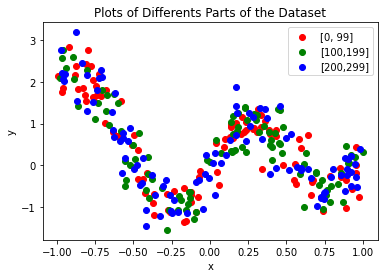

In [60]:
# Checking plots of differents parts of the dataset
plt.scatter(x=data["x"][:100], y=data["y"][:100], color="red", label="[0, 99]")
plt.scatter(x=data["x"][100:200], y=data["y"][100:200], color="green", label="[100,199]")
plt.scatter(x=data["x"][200:], y=data["y"][200:], color="blue", label="[200,299]")
plt.title("Plots of Differents Parts of the Dataset")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.plot()

# Train and Test Split

In [61]:
data_train = data.head(240)
data_test = data.tail(60)

In [ ]:
x_train = data_train["x"].values
y_train = data_train["y"].values

# Gradient Descent

In [184]:
class PolynomialGradientDescent(): 
    def __init__(self, learning_rate, number_epoch, degree, loss_function_name):
        self.learning_rate = learning_rate # Learning Rate
        self.number_epoch = number_epoch # Number of required epochs
        self.degree = degree # Degree of the polynomial
        
        self.c = np.zeros(degree+1) # Coefficients of polynomial: c[n]*(x**n) + ... + c[2]*(x**2) + c[1]*(x) + c[0]
        
        if loss_function_name == "MSE":
            self.loss_function = self.mse
            self.partial_loss_function = self.partial_mse
        elif loss_function_name == "RMSE":
            self.loss_function = self.rmse
            self.partial_loss_function = self.partial_rmse
        elif loss_function_name == "MAE":
            self.loss_function = self.mae
            self.partial_loss_function = self.partial_mae
        else:
            raise Exception("Unkwon Loss Function Name!")
        
    @staticmethod   
    def single_polynomial(c, x):
        sum = 0
        for i, ci in enumerate(c):
            sum += ci * (x**i)

        return sum
    
    @staticmethod
    def polynomial(c, x):
        return np.array([single_polynomial(c, xi) for xi in x])

    @staticmethod
    def mse(y_predict, y_real):
        n = len(y_predict)
        sum = 0
        for i in range(n):
            sum += (y_real[i]-y_predict[i])**2

        return sum/n

    @staticmethod
    def partial_mse(y_predict, y_real, x, c, partial_degree):
        n = len(x)
        sum = 0
        for i in range(n):
            sum +=  x[i]**partial_degree * (y_real[i] - y_predict[i])
        return -2/n*sum
    
    @staticmethod
    def rmse(y_predict, y_real):
        mse = PolynomialGradientDescent.mse(y_predict, y_real)
        return mse**(0.5)
    
    @staticmethod
    def partial_rmse(y_predict, y_real, x, c, partial_degree):
        return partial_mse(y_predict, y_real, x, c, partial_degree) / (2 * PolynomialGradientDescent.rmse(y_predict, y_real))
    
    @staticmethod
    def mae(y_predict, y_real):
        n = len(y_predict)
        sum = 0
        for i in range(n):
            sum += abs(y_real[i]-y_predict[i])
        
        return sum/n
    
    @staticmethod
    def partial_mae(y_predict, y_real, x, c, partial_degree):
        n = len(x)
        sum = 0
        for i in range(n):
            sum += np.sign(y_real[i]-y_predict[i]) * -1 * (x[i]**partial_degree)

        return sum/n
    
    def run(self):
        for epoch in range(self.number_epoch):
            c_new = []
            y_predict = polynomial(self.c, x_train)
            
            for i, ci in enumerate(self.c):
                ci_new = ci - self.learning_rate * self.partial_loss_function(y_predict, y_train, x_train, self.c, i)
                c_new.append(ci_new)

            self.c = np.array(c_new)
            
    def plot_prediction(self):
        x = np.arange(-1, +1, 0.01)
        y = polynomial(self.c, x)

        plt.plot(x, y, color="red")
        plt.scatter(x_train, y_train)
        plt.show()

In [200]:
polynomial_gradient_descent = PolynomialGradientDescent(learning_rate = 0.1, number_epoch = 5000, degree = 8, loss_function_name="MAE")

In [201]:
polynomial_gradient_descent.run()

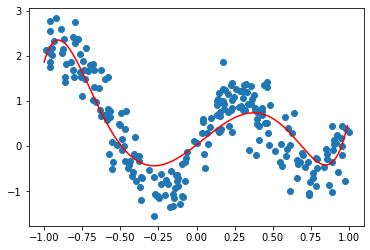

In [202]:
polynomial_gradient_descent.plot_prediction()